In [3]:
# !python -m pip install -U tifffile[all]
# !pip list
!python -m pip install --upgrade pip
!pip install tensorflow

  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.2.1
    Uninstalling pip-23.2.1:
      Successfully uninstalled pip-23.2.1


In [4]:
import numpy as np
import tensorflow as tf 
from tensorflow.keras import layers, Model
from osgeo import gdal
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import os
import pandas as pd

In [5]:
### Load Images using gdal library
def load_image(file_path):
    dataset = gdal.Open("C:\\Users\\48504\\Desktop\\JADSMaster\\DeepLearning\\satelite_images\\S1B_IW_GRDH_1SDV_20190123T162344_20190123T162409_014623_01B40F_3BD7_corrected_VV")
    if dataset is None:
        raise FileNotFoundError("Could not open file:", file_path)
    array = dataset.ReadAsArray()
    return array

(522, 544)


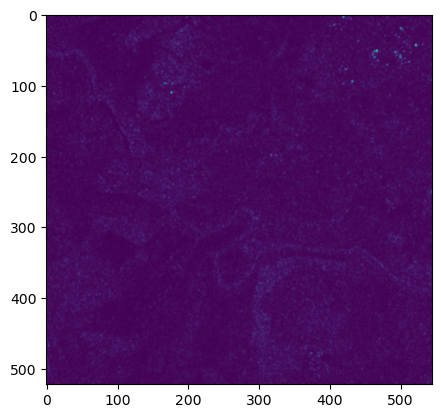

In [6]:
## load images as we saw on kaggle
img = tiff.imread("C:\\Users\\48504\\Desktop\\JADSMaster\\DeepLearning\\satelite_images\\S1B_IW_GRDH_1SDV_20190123T162344_20190123T162409_014623_01B40F_3BD7_corrected_VV.tif")
img_array = np.array(img)
plt.imshow(img)
print(img_array.shape)            

In [7]:
from osgeo import gdal
import os
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff
import pandas as pd

# Function to load image
def load_image(file_path):
    return gdal.Open(file_path)

# Load satellite images
folder_path = 'C:\\Users\\48504\\Desktop\\JADSMaster\\DeepLearning\\satelite_images\\'

multispectral_images = []
sar_images = []

for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)
    
    # Print file path for debugging
    print("Processing file:", file_path)
    
    if os.path.isfile(file_path):
        try:
            # Open the file
            dataset = load_image(file_path)
            if dataset is None:
                print("Could not open file:", file_path)
            else:
                print("File opened successfully!")
                # Check if the file is multispectral or SAR
                if file_name.startswith('S1'):
                    multispectral_images.append(dataset)
                elif file_name.startswith('S2'):
                    sar_images.append(dataset)
                else:
                    print("Unknown image type for file:", file_path)
        except Exception as e:
            print("Error loading file:", file_path)
            print("Error message:", str(e))

multispectral_images = np.array(multispectral_images)
sar_images = np.array(sar_images)

# Display the shapes of the arrays
print("Multispectral Images Shape:", multispectral_images.shape)
print("SAR Images Shape:", sar_images.shape)

Processing file: C:\Users\48504\Desktop\JADSMaster\DeepLearning\satelite_images\S1B_IW_GRDH_1SDV_20181230T162345_20181230T162410_014273_01A8CE_D597_corrected_VH.tif
File opened successfully!
Processing file: C:\Users\48504\Desktop\JADSMaster\DeepLearning\satelite_images\S1B_IW_GRDH_1SDV_20181230T162345_20181230T162410_014273_01A8CE_D597_corrected_VV.tif
File opened successfully!
Processing file: C:\Users\48504\Desktop\JADSMaster\DeepLearning\satelite_images\S1B_IW_GRDH_1SDV_20190111T162345_20190111T162410_014448_01AE74_EF21_corrected_VV.tif
File opened successfully!
Processing file: C:\Users\48504\Desktop\JADSMaster\DeepLearning\satelite_images\S1B_IW_GRDH_1SDV_20190123T162344_20190123T162409_014623_01B40F_3BD7_corrected_VV.tif
File opened successfully!
Multispectral Images Shape: (4,)
SAR Images Shape: (0,)


In [27]:
import os
import numpy as np
import tifffile as tiff
from sklearn.model_selection import train_test_split
from skimage.transform import resize

def load_images_from_directory(directory):
    images = []
    filenames = []

    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.tif') or filename.endswith('.tiff'):
            file_path = os.path.join(directory, filename)
            img = tiff.imread(file_path)
            img_array = np.array(img)
            images.append(img_array)
            filenames.append(filename)
    
    return images, filenames

# Load satellite images
directory = 'C:\\Users\\48504\\Desktop\\JADSMaster\\DeepLearning\\satelite_images\\'

# Load images from the directory
images, filenames = load_images_from_directory(directory)

# Assuming images is your list of numpy arrays representing images
resized_images = []

# Generate random labels (true or false) for each image
labels = np.random.choice([True, False], size=len(images))

# Define the target shape
target_shape = (522, 544)  # Example target shape, adjust as needed

# Iterate over each image array and resize it
for image in images:
    resized_image = resize(image, target_shape)
    resized_images.append(resized_image)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(resized_images, labels, test_size=0.2, random_state=42)

# Convert the resized images and labels into numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(X_train[2].shape)
print(X_test[0].shape)

# Optionally, you can also load labels if you have them and split them accordingly
# Example:
# y_train = load_labels(train_filenames)
# y_test = load_labels(test_filenames)


(522, 544)
(522, 544)


In [28]:
# import tenserflow as tensorflow
from tensorflow.keras import layers, models

# Assuming X_train and X_test are your training and testing data
# Convert the list of numpy arrays into numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)


from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(522, 544, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    # Flatten layer to transition from convolutional layers to fully connected layers
    layers.Flatten(),
    # Fully connected layers
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with single neuron for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Use binary cross-entropy loss for binary classification
              metrics=['accuracy'])  # Use accuracy as the metric for evaluation

# Reshape the input data to fit the model input shape
X_train = X_train.reshape((-1, 522, 544, 1))
X_test = X_test.reshape((-1, 522, 544, 1))

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
train_loss, train_accuracy = model.evaluate(X_train, y_train)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Train loss:', train_loss)
print('Test loss:', test_loss)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.6667 - loss: 0.6842 - val_accuracy: 1.0000 - val_loss: 8.1099e-09
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6667 - loss: 2.1338 - val_accuracy: 1.0000 - val_loss: 3.7804e-05
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6667 - loss: 0.7750 - val_accuracy: 1.0000 - val_loss: 0.0234
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6667 - loss: 0.2584 - val_accuracy: 1.0000 - val_loss: 0.3407
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.2715 - val_accuracy: 1.0000 - val_loss: 0.4312
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.2019 - val_accuracy: 1.0000 - val_loss: 0.1327
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0613 - val_accuracy: 1.0000 - val_loss: 0.0372
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0246 - val_accuracy: 1.0000 - val_loss: 0.5195
Epoch 

NameError: name 'train_mse' is not defined